# Tutorial: Logistic Regression

In this tutorial, we will build a logistic regression model to predict whether a person on the Titanic will survive


**Data Features and meanings**
- survival
    - Survival - 0 = No, 1 = Yes
- pclass
    - Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd
- sex
    - Sex	
- Age
    - Age in years	
- sibsp
    - #of siblings / spouses aboard the Titanic	
- parch
    - #of parents / children aboard the Titanic	
- ticket
    - Ticket number	
- fare
    - Passenger fare	
- cabin
    - Cabin number	
- embarked
    - Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

## Part 1: Load  data

In [2]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the Data Set
import pandas as pd
titanic_data = pd.read_csv('titanic.csv')

In [3]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##  Part 1.1 Explore data

The Prevalence of Each Classification Category

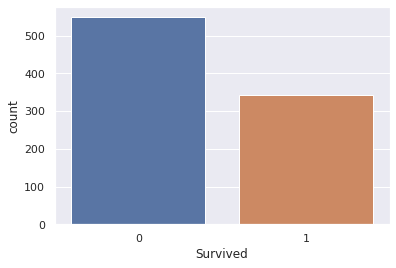

In [5]:
import seaborn as sns
sns.countplot(x='Survived', data=titanic_data)

Survival Rates Between Genders

Survival Rates Between Passenger Classes

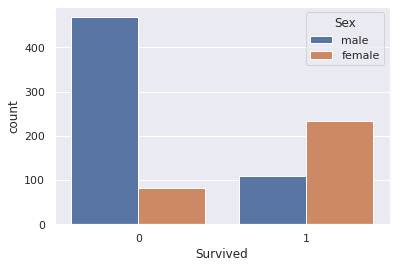

In [6]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

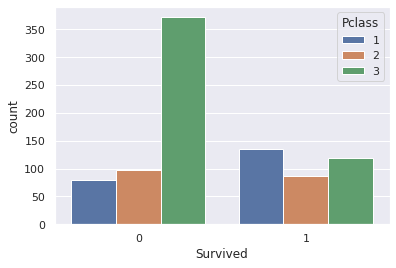

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

The Age Distribution of Titanic Passengers

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

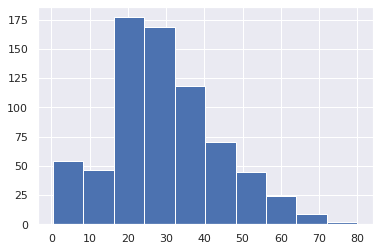

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(titanic_data['Age'].dropna())

The Ticket Price Distribution of Titanic Passengers

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

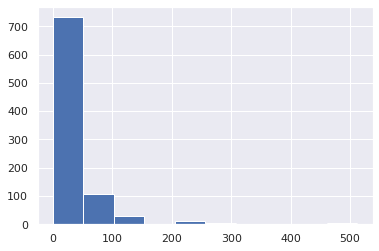

In [9]:
plt.hist(titanic_data['Fare'])

# Part 2: Preprocess data

In [11]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


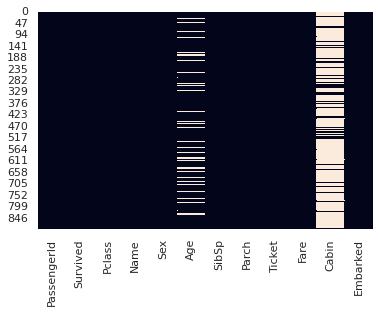

In [10]:
sns.heatmap(titanic_data.isnull(), cbar=False)

###  Imputation

We could create a supervised learning model to fill in missing age values based on other known features. Here we demonstrate an alternative method of value imputation: filling in missing values with averages.

Avg. Age for P-class 1: 38.233440860215055
Avg. Age for P-class 2: 29.87763005780347
Avg. Age for P-class 3: 25.14061971830986


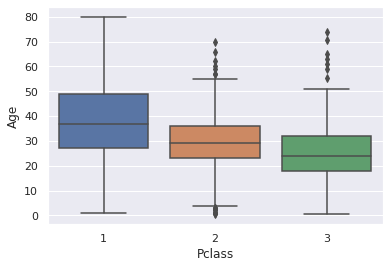

In [12]:
# fill in the missing Age values with the average Age value for the specific Pclass passenger class that the passenger belongs to
sns.boxplot(titanic_data['Pclass'], titanic_data['Age'])
#Pclass value 1
print('Avg. Age for P-class 1:',titanic_data[titanic_data['Pclass'] == 1]['Age'].mean())
#Pclass value 2
print('Avg. Age for P-class 2:',titanic_data[titanic_data['Pclass'] == 2]['Age'].mean())
#Pclass 3
print('Avg. Age for P-class 3:',titanic_data[titanic_data['Pclass'] == 3]['Age'].mean())

In [13]:
# define imputation function
def impute_missing_age(columns):
    age = columns[0]
    passenger_class = columns[1]
    if pd.isnull(age):
        if(passenger_class == 1):
            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()
        elif(passenger_class == 2):
            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()
        elif(passenger_class == 3):
            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()
    else:
        return age

# apply the function to every row in the titanic DataFrame.
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

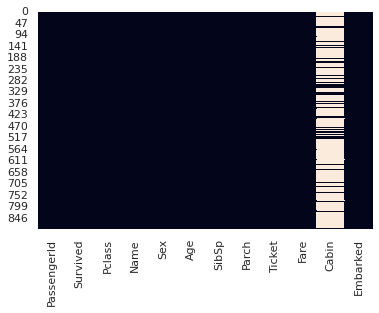

In [14]:
sns.heatmap(titanic_data.isnull(), cbar=False)

### Removing Columns With Too Much Missing Data

In [15]:
titanic_data.drop('Cabin', axis=1, inplace = True)

### Removing Null Data From Our Data Set

In [16]:
# Check missing value in data
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
# drop Missing value
titanic_data.dropna(inplace = True)

In [18]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Handling Categorical Data With Dummy Variables

In [19]:
pd.get_dummies(titanic_data,columns=['Sex'],prefix='',prefix_sep='').head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


As you can see, this creates two new columns: female and male. These columns will both be perfect predictors of each other, since a value of 0 in the female column indicates a value of 1 in the male column, and vice versa.

This is called multicollinearity and it significantly reduces the predictive power of your algorithm.

In [20]:
pd.get_dummies(titanic_data,columns=['Sex'],prefix='',prefix_sep='',drop_first = True).head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1


In [21]:
# to avoid multicollinearity
titanic_data = pd.get_dummies(titanic_data,columns=['Sex'],prefix='',prefix_sep='',drop_first = True)

In [22]:
# check dataframe columns
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'male'],
      dtype='object')

Removing some columns we decide not to use from the dataset

In [23]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [27]:
titanic_data = pd.get_dummies(titanic_data,columns=['Embarked'],prefix='',prefix_sep='',drop_first = True)

In [24]:
# check dataframe columns we have left
titanic_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'male'],
      dtype='object')

correlation

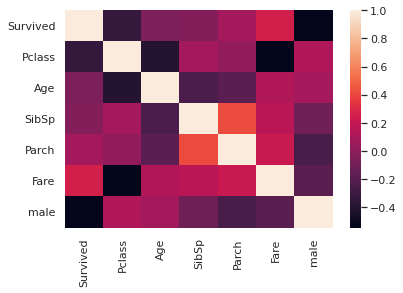

In [25]:
sns.heatmap(titanic_data.corr())

In [28]:
titanic_data.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
5,0,3,25.14062,0,0,8.4583,1,1,0
6,0,1,54.00000,0,0,51.8625,1,0,1
7,0,3,2.00000,3,1,21.0750,1,0,1
8,1,3,27.00000,0,2,11.1333,0,0,1
9,1,2,14.00000,1,0,30.0708,0,0,0


## Train/Test separation

X/y separation

In [29]:
x_data = titanic_data.drop(columns = ['Survived'])
y_data = titanic_data['Survived']

In [31]:
x_data.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [32]:
y_data

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

Perform hold-out method
- 70% training set
- 30% testing set

In [30]:
from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3,random_state=0)

## Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
x_training_data.loc[:,['Age', 'Fare']]=standard_scaler.fit_transform(x_training_data.loc[:,['Age', 'Fare']])

# Part 3: Train a logistic regression model

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model

LogisticRegression(random_state=0)

In [35]:
model.fit(x_training_data,y_training_data)

LogisticRegression(random_state=0)

Making Predictions With Our Logistic Regression Model

In [36]:
x_test_data.loc[:,['Age', 'Fare']]=standard_scaler.transform(x_test_data.loc[:,['Age', 'Fare']])

In [37]:
predictions = model.predict(x_test_data)

In [38]:
predictions

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1])

In [39]:
y_test_data

14     0
159    0
763    1
741    0
483    1
      ..
620    0
821    1
65     1
884    0
52     1
Name: Survived, Length: 267, dtype: int64

### Part 4: Model Evaluation

Evaluation metrics
- confusion metrix
- accuracy
- precision, recall, f1-score

Measuring the Performance

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Accuracy:\t %.3f" %accuracy_score(y_test_data, predictions))
print(classification_report(y_test_data, predictions))

Accuracy:	 0.775
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       157
           1       0.75      0.68      0.71       110

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267



confusion matrix

In [41]:
x_test_data

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
14,3,-1.126362,0,0,-0.476827,0,0,1
159,3,-0.300921,8,2,0.788268,1,0,1
763,1,0.503682,1,2,1.822764,0,0,1
741,1,0.503682,1,0,0.978968,1,0,1
483,3,2.504191,0,0,-0.441285,0,0,1
...,...,...,...,...,...,...,...,...
620,3,-0.163154,1,0,-0.341492,1,0,0
821,3,-0.163154,0,0,-0.460253,1,0,1
65,3,-0.300921,1,1,-0.325260,1,0,0
884,3,-0.311340,0,0,-0.493318,1,0,1


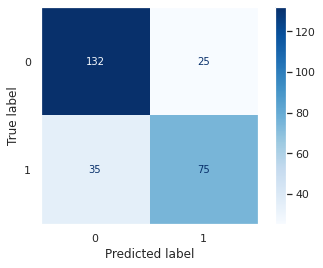

accuracy:  0.7752808988764045


In [42]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
cm = plot_confusion_matrix(model,x_test_data, y_test_data,cmap="Blues",values_format='.3g');
plt.grid(None)
plt.show()

y_pred = model.predict(x_test_data)
print("accuracy: ",accuracy_score(y_test_data, y_pred))

### Part 5: Model tuning

#### Try tuning the model to see if you can make it perform better?

You can look at the parameters and functions of Logistic Regression at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Try tuning Hyperparameter
***Note that to do this properly, you should split data into train/validation/test set and tune them on validation set, not test set***

C is float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization

In [43]:
model = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=None,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2',random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)
print("Accuracy:\t %.3f" %accuracy_score(y_test_data, predictions))
print(classification_report(y_test_data, predictions))

Accuracy:	 0.730
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       157
           1       0.73      0.55      0.63       110

    accuracy                           0.73       267
   macro avg       0.73      0.70      0.71       267
weighted avg       0.73      0.73      0.72       267



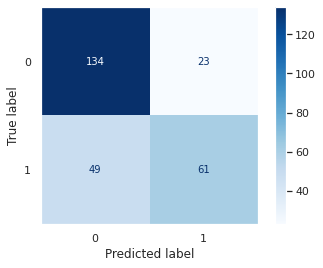

accuracy:  0.7303370786516854


In [44]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
cm = plot_confusion_matrix(model,x_test_data, y_test_data,cmap="Blues",values_format='.3g');
plt.grid(None)
plt.show()

y_pred = model.predict(x_test_data)
print("accuracy: ",accuracy_score(y_test_data, y_pred))

## Parameter Turning with K-Folds Cross Validation

In [45]:
parameters = {
    'C': [0.01, 0.1, 0.5, 1, 5, 10],
    'fit_intercept': [True, False],
    'random_state': [0,1,2],
    'solver': ['liblinear', 'lbfgs']
}

In [46]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
model = GridSearchCV(clf, parameters, cv=5, scoring='accuracy',n_jobs=-1)
model.fit(x_training_data, y_training_data)

predictions = model.best_estimator_.predict(x_test_data)
print("Accuracy:\t %.3f" %accuracy_score(y_test_data, predictions))
print(classification_report(y_test_data, predictions))

Accuracy:	 0.783
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       157
           1       0.77      0.68      0.72       110

    accuracy                           0.78       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267



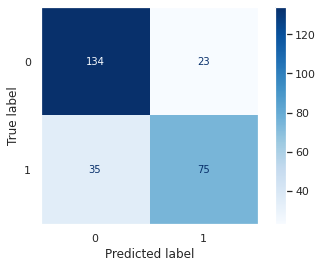

accuracy:  0.7827715355805244


In [47]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
cm = plot_confusion_matrix(model.best_estimator_,x_test_data, y_test_data,cmap="Blues",values_format='.3g');
plt.grid(None)
plt.show()

print("accuracy: ",accuracy_score(y_test_data, predictions))

## Feature importance

In [48]:
# model coefficient
print(dict(zip(list(x_training_data.columns), model.best_estimator_.coef_[0])))

feature_importance_m = abs(model.best_estimator_.coef_[0])
feature_importance_m = 100.0 * (feature_importance_m / feature_importance_m.max())


lr_feature_m = pd.DataFrame({'feature':x_training_data.columns,
                             'Score':feature_importance_m})

lr_feature_m.sort_values(by = 'Score', ascending=False).head()

{'Pclass': -1.2861019731590417, 'Age': -0.7672103952329288, 'SibSp': -0.3751681336227628, 'Parch': -0.06900104398323881, 'Fare': 0.07330129080132802, 'male': -2.7905909044394046, 'Q': 0.40479065879287357, 'S': -0.4180631609260029}


,feature,Score
5,male,100.000000
0,Pclass,46.087084
1,Age,27.492758
7,S,14.981170
6,Q,14.505554
